# Falling object under the influence of gravity and air resistance

## Introduction


We here try to answer a question: if an object was dropped from a high place, when would it hit the ground. 
At the same time, we would add some other information during the process of the falling.  

A falling object is subjected to the gravity of the planet pointing downward and drag force pointing upward: 

$$
F_g= G\frac{mM}{r^2}
$$

$$
F_d=\frac{1}{2}\rho v^2 C_D A 
$$

, where $F_g$ is gravitational force and $F_d$ is drag force. 

In [43]:
print('{:^100}'.format('***Welcome to the simulation***'))
print('{:^100}'.format("First, I want to know about the object to be simulated"))
print('{:^100}'.format('The following values should be given as instructed.') )
print('{:^100}'.format('All numbers should be in SI units'))


                                  ***Welcome to the simulation***                                   
                       First, I want to know about the object to be simulated                       
                        The following values should be given as instructed.                         
                                 All numbers should be in SI units                                  


## Imports 

In [44]:
from frozendict import frozendict

## Asking for input values

In [45]:
jono='The following values should be given as instructed, and in SI units without prefixes'

#reading input data the user 
while True:
    inputvalues=input('initial height, mass (m), cross-sectional area, name of object, fluid density, mass of planet (M), radius of planet (R)') 
    #this can be input value: '300,80,4,human,1.225,5.972e24,6371e3'
    inputvalues=inputvalues.split(',')
    if len(inputvalues)<7:
        print('Please check the missing information!')
    elif len(inputvalues)>7:
        print('There is something some needless numbers, please check!')
    else:
        break 

initial height, mass (m), cross-sectional area, name of object, fluid density, mass of planet (M), radius of planet (R) 828,80,4,human,1.225,5.972e24,6371e3


In [46]:
#saving data into dictionary 
inputdict={}

#physics symbols 
symbolnamelist='h,m,A,name,rho,M,R'.split(',')

for symbol, values in zip(symbolnamelist, inputvalues):
    try:
        inputdict[symbol] = float(values) 
    except:
        inputdict[symbol]=values 

#gravitational constant
inputdict['G']=  6.67408e-11
#frozing the dictionary
inputdict=frozendict(inputdict)

## Initial values

In [47]:
h=inputdict['h']  #initial height from the ground 
m=inputdict['m'] #object's mass
A=inputdict['A'] #object's cross-sectional area 
name = inputdict['name'] # what object is it
rho=inputdict['rho'] #fluid density 
M=inputdict['M'] #in which planet
R=inputdict['R']   # planet's radius 
G=inputdict['G']  #gravitational constant 

### Dictionary for drag coefficients for different objects

In [48]:
C_dict={'human': 1.15, 'smooth sphere': 0.1}

Determining the drag coefficient: 

In [49]:
if name in C_dict:
    Cd=C_dict[name]
else:
    Cd=input('Give the drag coefficient of the object: ')

## Functions

In [50]:
#Gravitation
def Fg(r):
    return G*m*M/r**2

#drag 
def Fd(v):
    return 1/2*rho*v**2*Cd*A

## Data structure

We store data of the object into this dictionary: (time, position, velocity, acceleration, total force):

In [51]:
data={'t': [], 'y': [], 'v': [], 'a': [] , 'F':[], 'Fd':[], 'Fg': []}

## Running the simulation

Here we determine the length of a time step: 

In [52]:
deltat=0.001

Running the simulation:

In [53]:
#the values in the first step     
y=h 
v=0
F= -Fg(R+h)
a= F/m 
t=0 


while True: 
    #saving data to the dictionary 
    data['t'].append(t)
    data['y'].append(y)
    data['v'].append(v)
    data['a'].append(a)   
    data['F'].append(F)
    data['Fg'].append(Fg(R+y))
    data['Fd'].append(Fd(v))
    
    #stopping simulation when the object hit the ground 
    if y<=0:
        break     
    
    
    #verlet algorithm 
    y=y+v*deltat+ 1/2*a*deltat**2*deltat
    t+=deltat
    F= Fd(v)-Fg(y+R)
    v=v+1/2*(a+F/m)*deltat 
    a=F/m 




## Plotting 


In [54]:
%matplotlib inline
import matplotlib.pyplot as plt 

### Plots

Here we produce the plots of position, velocity, acceleration and total force vs time. 

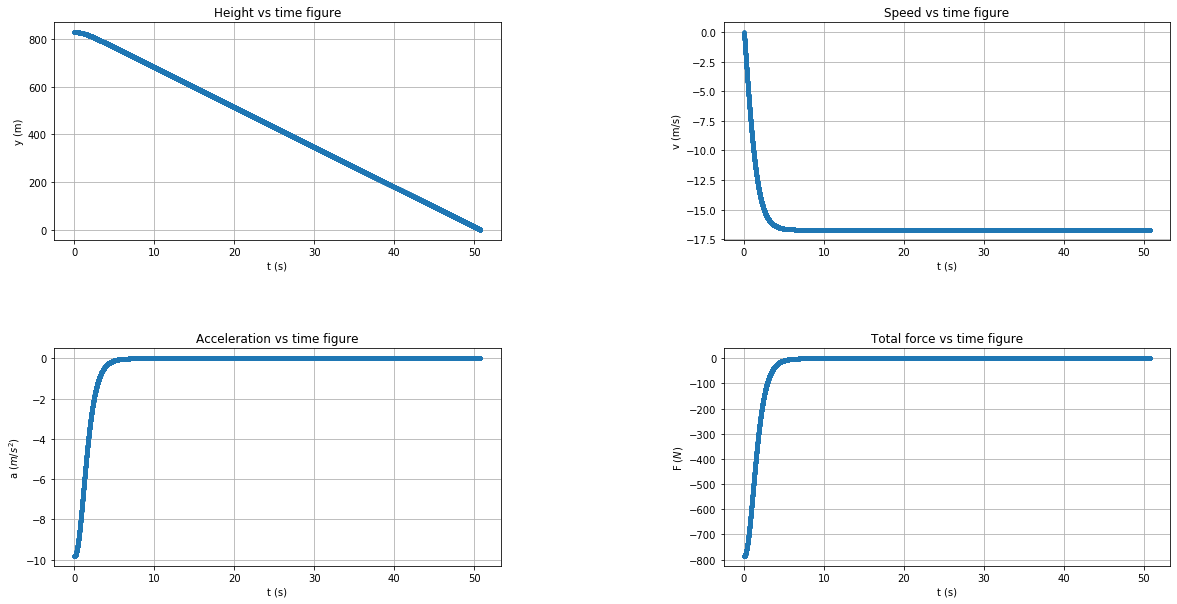

In [55]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(20,10))

#t vs y 
ax1.plot(data['t'], data['y'], '.')
ax1.set_xlabel('t (s)')
ax1.set_ylabel('y (m)')
ax1.set_title('Height vs time figure')

#t vs v 
ax2.plot(data['t'], data['v'], '.')
ax2.set_xlabel('t (s)')
ax2.set_ylabel('v (m/s)')
ax2.set_title('Speed vs time figure')

#t vs a
ax3.plot(data['t'], data['a'], '.')
ax3.set_xlabel('t (s)')
ax3.set_ylabel('a $(m/s^2)$')
ax3.set_title('Acceleration vs time figure')

#t vs F
ax4.plot(data['t'], data['F'], '.')
ax4.set_xlabel('t (s)')
ax4.set_ylabel('F $(N)$')
ax4.set_title('Total force vs time figure')





#adjusting plots 
plt.subplots_adjust(hspace=0.5, wspace=0.5)
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.show()



### Force plots 

Here we produce the plots of absolute value of gravitational force and drag force. 

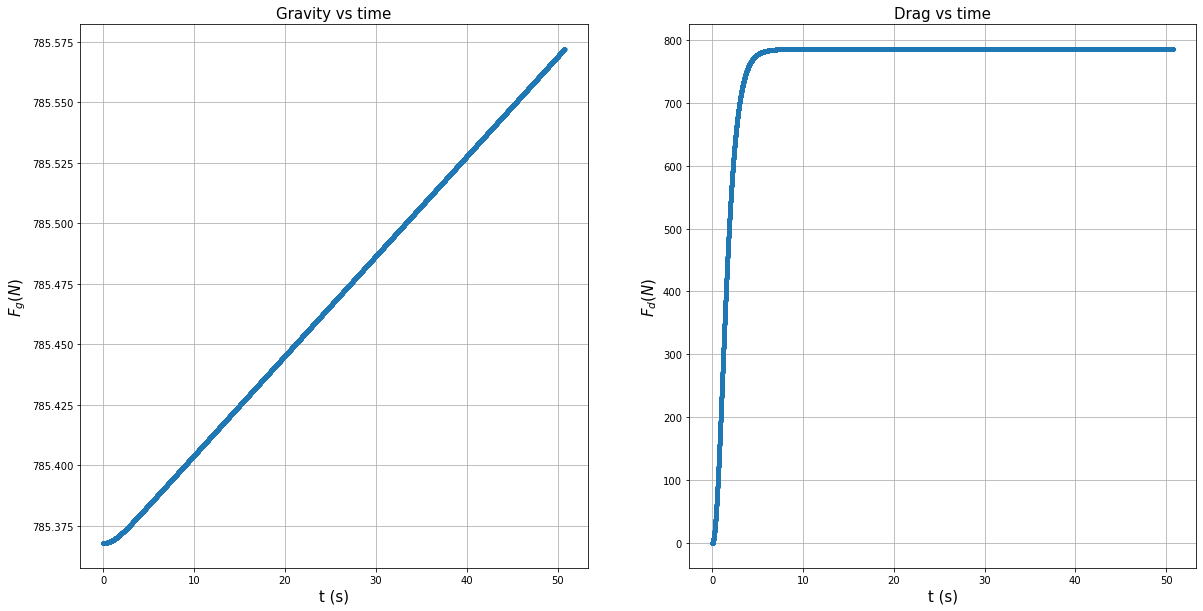

In [56]:
fig2, axs= plt.subplots(1, 2, figsize=(20,10))

axs[0].plot(data['t'], data['Fg'], '.') 
axs[1].plot(data['t'], data['Fd'], '.') 
axs[0].set_xlabel('t (s)', fontsize=15)
axs[1].set_xlabel('t (s)', fontsize=15) 
axs[0].set_ylabel('$F_g (N)$', fontsize=15)
axs[1].set_ylabel('$F_d (N)$', fontsize=15) 
axs[0].grid()
axs[1].grid()
axs[0].set_title('Gravity vs time', fontsize=15)
axs[1].set_title('Drag vs time', fontsize=15)


plt.show()
